# Beamforming - Capon method

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#plt.rcParams['font.size'] = '10'

In [146]:
# Arreglo de receptores
lamb = 6
k = 2*np.pi/lamb
dx = 2
Nr = 16
d = dx * np.arange(Nr)

# Target 1:
phi1 = 25 * np.pi/180
P1 = 10
S1 = np.sqrt(P1)*np.exp(1j*k*d*np.sin(phi1))

# Target 2:
phi2 = -45 * np.pi/180
P2 = 5
S2 = np.sqrt(P2)*np.exp(1j*k*d*np.sin(phi2))

# Estimando la matriz de covarianza de x
N = 1000
Cx = 0
for n in range(N):
    w = (np.random.randn(Nr) + 1j*np.random.randn(Nr))/np.sqrt(2)
    x = S1 + S2 + w
    x = np.reshape(x,[Nr,1])
    Cx += x@np.conj(x.T)
Cx = Cx/N
Cx_1 = np.linalg.inv(Cx)
#print(Cx)

In [147]:
# Calculando la potencia para diferentes ángulos
Na = 180
ang = np.arange(Na) - Na/2
B = np.zeros(Na)

for n in range(Na):
    phi = ang[n] * np.pi/180
    h = np.exp(1j*k*d*np.sin(phi))
    B[n] = 1/np.real(np.conj(h.T)@Cx_1@h)
    

Text(0.5, 0, 'Angle [deg]')

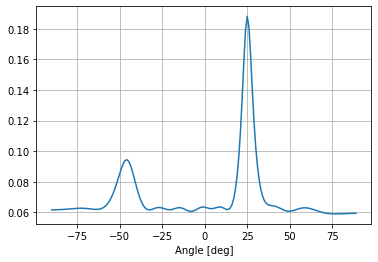

In [148]:
# Graficando el patrón
plt.figure()
plt.plot(ang,B)
plt.grid('on')
plt.xlabel('Angle [deg]')